# AerE 160 Computer Lab #3, Fall 2020

## Savings simulation

Name: Nick McCullough

ISU Email: nickmcc@iastate.edu

Section #: 1

Lab TA: Harsha Sista



In [1]:
%matplotlib notebook
# (Remove the above line for Spyder; 
# you will need to type '%matplotlib qt' into the command window instead.)
import numpy as np
from matplotlib import pyplot as pl

In this lab we will be preparing for a future lab simulating rocket trajectories by simulating something simpler: The growth of invested savings. 

You will need is the "pint" units package that was discussed in the lectures. This is included in the web-based Jupyter (aere160-python3 kernel) we have at https://class-jupyterhub.its.iastate.edu but on your own laptop you will need to add the package if you haven't already. 

To install "pint" into Anaconda, you need to open an "Anaconda Prompt" and then enter `conda install -c conda-forge pint`. You will need to tell it to proceed when asked. If you installed Anaconda as an administrator you will need to run the Anaconda Prompt as an administrator as well in order to do the installation. 

Once `pint` is installed you should be able to execute `import pint` at the Spyder prompt or inside Jupyter without an error. Try it here:

In [2]:
import pint

`pint` is a package for helping track units through calculations. Units are important for engineers because if we get them wrong, bad things happen (see for example the loss of the Mars Climate Orbiter https://www.simscale.com/blog/2017/12/nasa-mars-climate-orbiter-metric/ )

To use `pint` we must first create a 'unit registry':

In [3]:
ur = pint.UnitRegistry()

Now `ur.m` represents meters, `ur.s` represents seconds, `ur.N` represents Newtons, `ur.kg` represents kilograms, etc.

While we're at it, we'll need to have units of dollars below, so let's add the `dollar`, a unit of currency with a synonym of `dollars` to the registry:

In [4]:
ur.define("dollar = [currency]")
ur.define("dollars = dollar")

You can multiply numbers or numpy arrays by these units to get dimensioned quantities. 

WARNING: If you recreate the unit registry by re-executing the above line, all previously created units may become invalid, so you may need to re-execute all the other cells as well

How much force is required to accelerate a 5 kg object at 10 m/s$^2$? 

Given $F=ma$, 

In [5]:
F = (5*ur.kg) * (10*ur.m/ur.s**2)
print(type(F))
print(F)

<class 'pint.quantity.build_quantity_class.<locals>.Quantity'>
50.0 kilogram * meter / second ** 2


The variable `F` is no longer a python `float`; it is a pint `Quantity`. But as you have seen we can still use it in arithmetic operations. 

But what if we want just the number? There are two steps. 
1. Call the .to() method to convert to the desired units. We expect force in Newtons so convert to Newtons. This operation would fail if the units were not convertible to Newtons (which would usually indicate an error in our formulas).

In [6]:
print(F.to(ur.N))

50.0 newton


2. Access the `.magnitude` attribute to get just the number, without any units attached.   

In [7]:
print(F.to(ur.N).magnitude) # print the force in Newtons

50.0


`pint` can also do more sophisticated unit conversions. `ur.lbf` represents 'pounds force', the US customary unit of force. Dividing the variable instead by ur.lbf gives us the force in pounds:

In [8]:
print(F.to(ur.lbf).magnitude) # print the force in pounds

11.240447154985526


Attempting to convert a quantity that has unresolvable units will result in an error. For example `ur.lb` represents pounds mass, the US customary unit of mass. 

In [9]:
# attempting to print the force in pounds mass gives a DimensionalityError
print(F.to(ur.lb).magnitude) 

DimensionalityError: Cannot convert from 'kilogram * meter / second ** 2' ([length] * [mass] / [time] ** 2) to 'pound' ([mass])

### 1. Unit conversions
As a general rule all engineering equations should be dimensionally correct, meaning the units on both sides of the equation are the same. Occasionally you may come across equations that appear to be dimensionally incorrect. Generally this means that some number in the equation implicitly has units. For example, the FAA Pilots Handbook of Aeronautical Knowledge https://www.faa.gov/regulations_policies/handbooks_manuals/aviation/phak/ in Chapter 11, page 14 gives the following equation to estimate the speed at which an airplane wheel on a runway begins to hydroplane: 

$v_{h} \mbox{ in nautical miles/hour} = 9\times \sqrt{\mbox{Tire pressure in psi}}$

In this case the number 9 implicitly has the units (nautical miles/hour)/$\sqrt{\mbox{psi}}$. 
 
Write out the right-hand side of the above equation as code for a tire pressure of 49 psi, giving proper units to 9 and the tire pressure. You can represent the square root as a power (`**` operator) of 0.5. 

Then print out the result in units of meters per second `(ur.m/ur.s)`, nautical miles per hour (`ur.knot`), and parsecs per millennium (`ur.parsec/ur.millennium`)

**Note: The older version of Pint on class-jupyterhub.its.iastate.edu only works if you misspell millennium with only one n. The newer version you have from Anaconda only works with millennium spelled correctly **

In [13]:
X = (9)*(ur.knot/(ur.psi**0.5))*((49*ur.psi)**0.5)
print(X)
print(X.to(ur.m/ur.s))
print(X.to(ur.parsec/ur.millennium))

63.0 knot
32.410000000000004 meter / second
3.3146101269390664e-05 parsec / millennium


### 2. Calculating growth of savings

We all need to save so that we have a financial cushion as we get older. How can we estimate what we might accumulate in the future based on different savings practices? 

The usual math class answer is to assume some savings rate -- let's say s=$5,000 per year, and some sort of interest rate -- let's say r=2% per year. Then we write an expression for the rate of change of our savings

$$
  \frac{d\$}{dt} = s + r\$ 
$$

Then we separate the variables (divide by $ s+r\$ $), multiply by dt

$$
\frac{d\$}{s+r\$} = dt
$$
integrate both sides
$$
  \int_{\$_{0}}^{$}\frac{d\$}{s+r\$} = \int_{t=0}^{t} dt
$$
u-substitution ($u = s+r\$ $; $du = rd\$ $:
$$
  \frac{1}{r}\int_{s+r\$_{0}}^{s+r\$}\frac{du}{u} = \int_{t=0}^{t} dt
$$
Evaluate the integrals:
$$
  \left.\frac{1}{r} \ln u \right|_{s+r\$_{0}}^{s+r\$} = t
$$
Now there are a few steps of rearranging:
$$
  \ln\frac{s+r\$}{s+r\$_{0}} = rt
$$
$$
  \frac{s+r\$}{s+r\$_{0}} = \exp(rt)
$$
$$
  s+r\$ = (s+r\$_{0})\exp(rt)
$$
$$
  \$ = \frac{(s+r\$_{0})\exp(rt) -s}{r}
$$
$$
  \$ = \frac{s(\exp(rt)-1)}{r} + \$_{0}\exp(rt)
$$
The left term represents the growth due to your saving, whereas the right term represents the growth of whatever you started with. 

While the above process gave us an answer that can give us insight into how we expect things to change over time (exponential growth), the process fails if the starting formula gets much more complicated because (and they often don't say this in math class) most integrals don't have analytic solutions. 

### Simpler alternative
Here we will illustrate a very simple alternative that can do the calculation numerically. It also has the advantage that it can accommodate arbitrary forms for $d\$/dt$

The basic idea is to take our starting equation
$$
  \frac{d\$}{dt} = s + r\$ 
$$
and let $d\$ $ and $dt$ change from infinitesimal (as in the derivative) to merely small, which we will refer to here as $\delta\$ $ and $\delta t$ (in the code we will use `ddol` and `dt` to represent $\delta\$ $ and $\delta t$ respectively)

Then we simply multiply through by $\delta t$:
$$
  \delta\$ = (s + r\$)\delta t 
$$
giving the change in saved dollars at any point in time, from the savings rate $s$, interest rate $r$, current amount saved $\$ $ and the time step $\delta t$.

We can repeatedly evaluate the right-hand-side over a large number of small time steps, interpreting it as the change in $\$ $ in that time step, and adding the change to the current value of $\$ $. So let's get started: 


In [14]:
# Let's define the starting values, saving amount, and interest rate
dol0 = 2000.0 * ur.dollars
s = 5000*ur.dollars/ur.year # Saving amount
r = 0.02/ur.year # reasonable estimate for bank interest after inflation
# (we are treating this as an interest rate for "continuous compounding")

# Let's define a time step. This is arbitrary, but the calculation will
# be more accurate if this is small
dt = 0.1 * ur.year  # 1/10 of a year -- about 36 days. 

# Let's define a range of times as a numpy array. We'll use 
# the 'np.arange()' function which constructs a range of values from 
# a starting value to an ending value with a given step
t = np.arange(0,30,dt.to(ur.year).magnitude)*ur.year

# let's print out the range of t values
print(t)

[0.0 0.1 0.2 0.30000000000000004 0.4 0.5 0.6000000000000001 0.7000000000000001 0.8 0.9 1.0 1.1 1.2000000000000002 1.3 1.4000000000000001 1.5 1.6 1.7000000000000002 1.8 1.9000000000000001 2.0 2.1 2.2 2.3000000000000003 2.4000000000000004 2.5 2.6 2.7 2.8000000000000003 2.9000000000000004 3.0 3.1 3.2 3.3000000000000003 3.4000000000000004 3.5 3.6 3.7 3.8000000000000003 3.9000000000000004 4.0 4.1000000000000005 4.2 4.3 4.4 4.5 4.6000000000000005 4.7 4.800000000000001 4.9 5.0 5.1000000000000005 5.2 5.300000000000001 5.4 5.5 5.6000000000000005 5.7 5.800000000000001 5.9 6.0 6.1000000000000005 6.2 6.300000000000001 6.4 6.5 6.6000000000000005 6.7 6.800000000000001 6.9 7.0 7.1000000000000005 7.2 7.300000000000001 7.4 7.5 7.6000000000000005 7.7 7.800000000000001 7.9 8.0 8.1 8.200000000000001 8.3 8.4 8.5 8.6 8.700000000000001 8.8 8.9 9.0 9.1 9.200000000000001 9.3 9.4 9.5 9.600000000000001 9.700000000000001 9.8 9.9 10.0 10.100000000000001 10.200000000000001 10.3 10.4 10.5 10.600000000000001 10.70000

Now define a new variable `dol_history` to store the history of how much money we have at any given time. Use the `np.zeros()` function (you can use `help(np.zeros)` to get more information on it) multiplied by `ur.dollars` to create a space to store the history. Use `len(t)` as the `shape` parameter to `np.zeros()` so it has the same size as the range of time values.


In [15]:
dol_history=np.zeros(len(t))*ur.dollars
print(dol_history)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Now we'll  initialize the current total savings `dol` to `dol0`. Then we'll write a loop where we calculate the change in savings in each iteration and add that on to `dol`:

In [16]:
dol = dol0
for tcnt in range(len(t)):
    # Store the current value of dol in dol_history
    dol_history[tcnt] = dol
    
    # Calculate the change in dollars in this iteration
    # (From the formula under "Simpler alternative", above).
    ddol = (s+r*dol)*dt
    
    # Write code here to assign to dol its old value plus the change
    dol=ddol+dol
    print(dol)

2504.0 dollars
3009.008 dollars
3515.026016 dollars
4022.056068032 dollars
4530.100180168064 dollars
5039.1603805284 dollars
5549.238701289457 dollars
6060.337178692036 dollars
6572.45785304942 dollars
7085.602768755519 dollars
7599.77397429303 dollars
8114.973522241616 dollars
8631.203469286098 dollars
9148.46587622467 dollars
9666.76280797712 dollars
10186.096333593074 dollars
10706.46852626026 dollars
11227.88146331278 dollars
11750.337226239406 dollars
12273.837900691884 dollars
12798.385576493267 dollars
13323.982347646253 dollars
13850.630312341546 dollars
14378.331572966228 dollars
14907.08823611216 dollars
15436.902412584384 dollars
15967.776217409553 dollars
16499.711769844373 dollars
17032.71119338406 dollars
17566.77661577083 dollars
18101.91016900237 dollars
18638.113989340374 dollars
19175.390217319054 dollars
19713.74099775369 dollars
20253.168479749198 dollars
20793.674816708695 dollars
21335.262166342112 dollars
21877.932690674796 dollars
22421.688556056146 dollars
2296

Now let's plot the history against the formula we got from the math class method

<IPython.core.display.Javascript object>


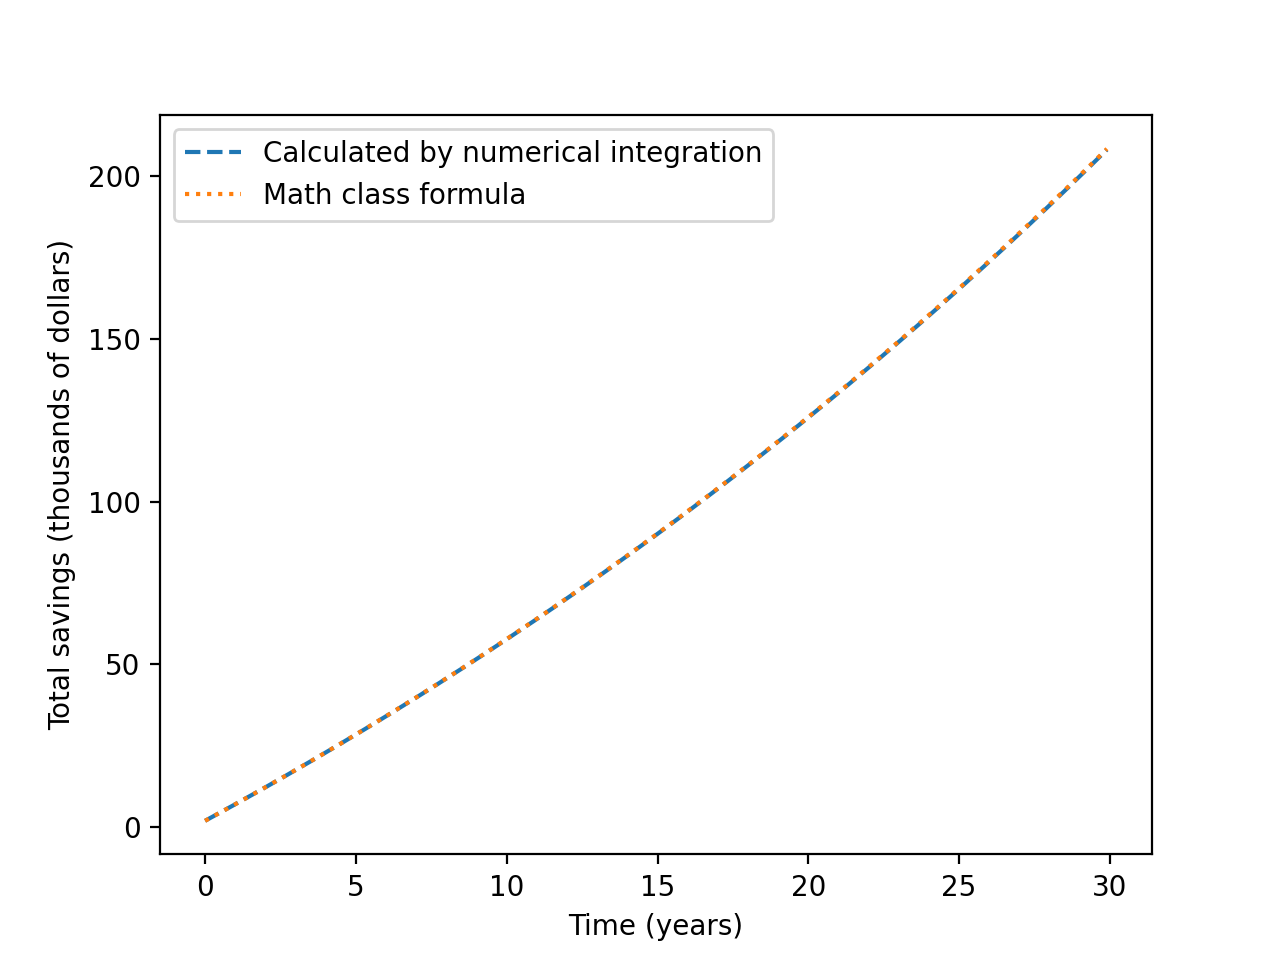

In [17]:
pl.figure()
# Note: the '--' as third parameter gives a dashed line
pl.plot(t.to(ur.year).magnitude,dol_history.to(ur.dollars).magnitude/1000,'--')

math_class_formula = s*(np.exp(r*t)-1)/r + dol0*np.exp(r*t)

# Note: the '--' as third parameter gives a dotted line
pl.plot(t.to(ur.year).magnitude,math_class_formula.to(ur.dollars).magnitude/1000,':')

pl.xlabel('Time (years)')
pl.ylabel('Total savings (thousands of dollars)')

# Show a legend that labels the two curves (which should be exactly 
# superimposed)
pl.legend(('Calculated by numerical integration','Math class formula'))



We could have called what we just did "Numerical Integration of Ordinary Differential Equations by Euler's method". Sounds a lot harder that way, doesn't it?. 

### A more complicated prediction

Interest rates fluctuate over time. How does it change our prediction if we assume sinusoidal variation of +/- 2% from a 2% per year average over an 11 year economic cycle? 

In [18]:
# We'll define a new function r_fluct(t) to replace r

cycle_frequency = 1/(11*ur.year)
def r_fluct(t):
    return .02/ur.year + (.02/ur.year)*np.cos(2*np.pi*cycle_frequency*t)

Write code to calculate and plot the assumed interest rate fluctuation over our range of times. Be sure to label axes! (What are the units of the interest rate?)

<IPython.core.display.Javascript object>


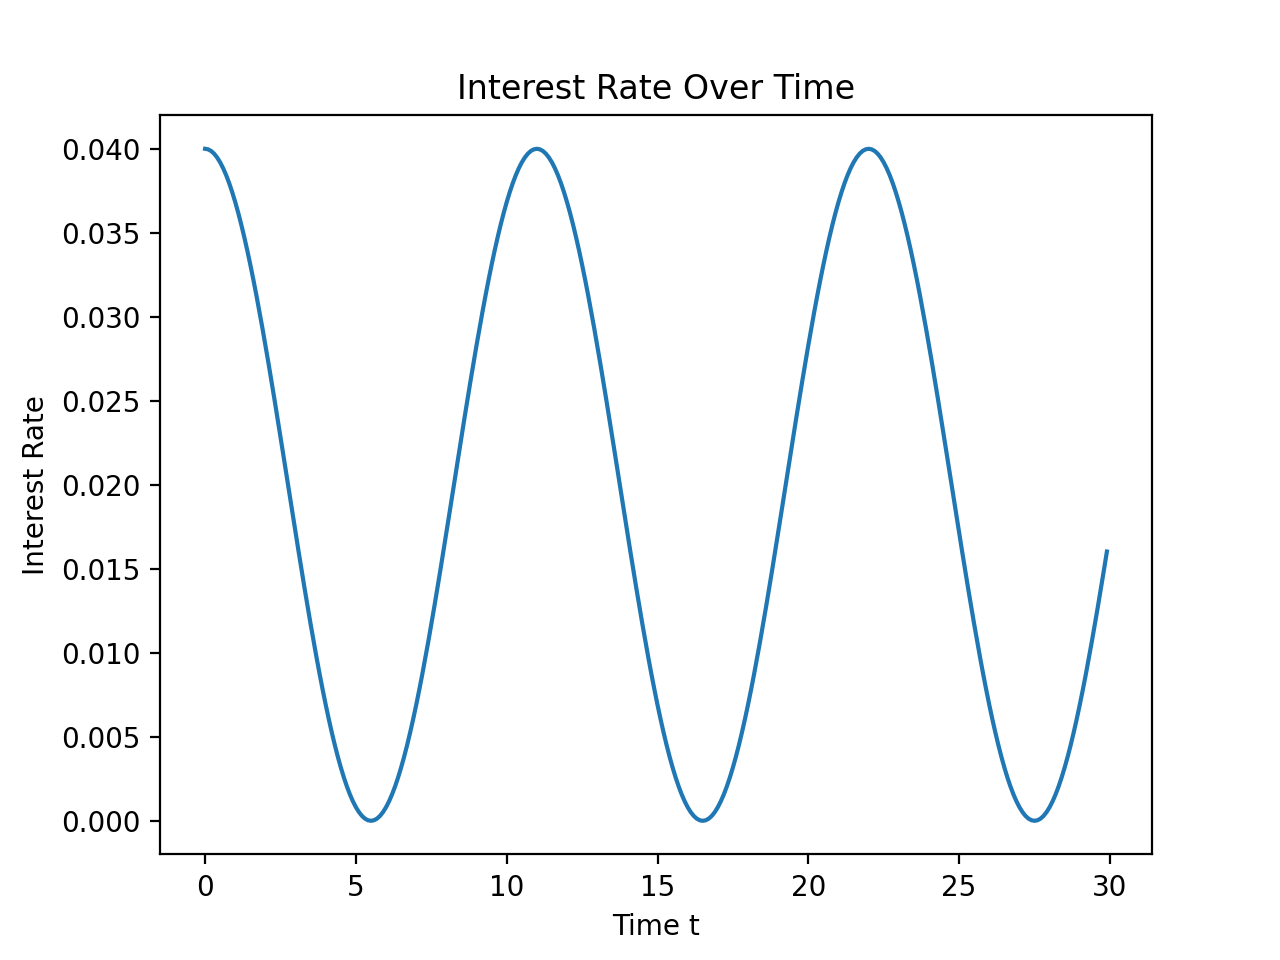

/Users/Nick/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Interest Rate Over Time')

In [19]:
pl.figure()
pl.plot(t,r_fluct(t),'-')
pl.xlabel("Time t")
pl.ylabel("Interest Rate")
pl.title("Interest Rate Over Time")

Now copy and modify your code from above to create a variable `dol_history2` to store the new output, and calculate values replacing the old interest rate `r` with a call to `r_fluct(t[tcnt])` to get the fluctuating interest rate at time index `tcnt`. 

In [20]:
dol_history2=np.zeros(len(t))*ur.dollars
dol = dol0
for tcnt in range(len(t)):
    dol_history2[tcnt] = dol
    ddol = (s+r_fluct(t[tcnt])*dol)*dt
    dol=ddol+dol
    print(dol)

2508.0 dollars
3018.0238194252934 dollars
3530.056570147036 dollars
4044.0733928516374 dollars
4560.039490992594 dollars
5077.910221676604 dollars
5597.631244362665 dollars
6119.1387279325845 dollars
6642.359616347232 dollars
7167.2119527374325 dollars
7693.605261394488 dollars
8221.440986726238 dollars
8750.612987834167 dollars
9281.008086949381 dollars
9812.506669544857 dollars
10344.983333522869 dollars
10878.307584464874 dollars
11412.3445735314 dollars
11946.955874216705 dollars
12482.00029380217 dollars
13017.334715018453 dollars
13552.814963123963 dollars
14088.29669334066 dollars
14623.63629336135 dollars
15158.691795459186 dollars
15693.323792592715 dollars
16227.396352811125 dollars
16760.777926225746 dollars
17293.34223882659 dollars
17824.96916748681 dollars
18355.54559061319 dollars
18884.966209065664 dollars
19413.134332181857 dollars
19939.962624000764 dollars
20465.373805079984 dollars
20989.301305639492 dollars
21511.68986613741 dollars
22032.49608178481 dollars
22551.

Now plot both `dol_history` and `dol_history2` on the same axes and compare. Does the difference make sense? 

<IPython.core.display.Javascript object>


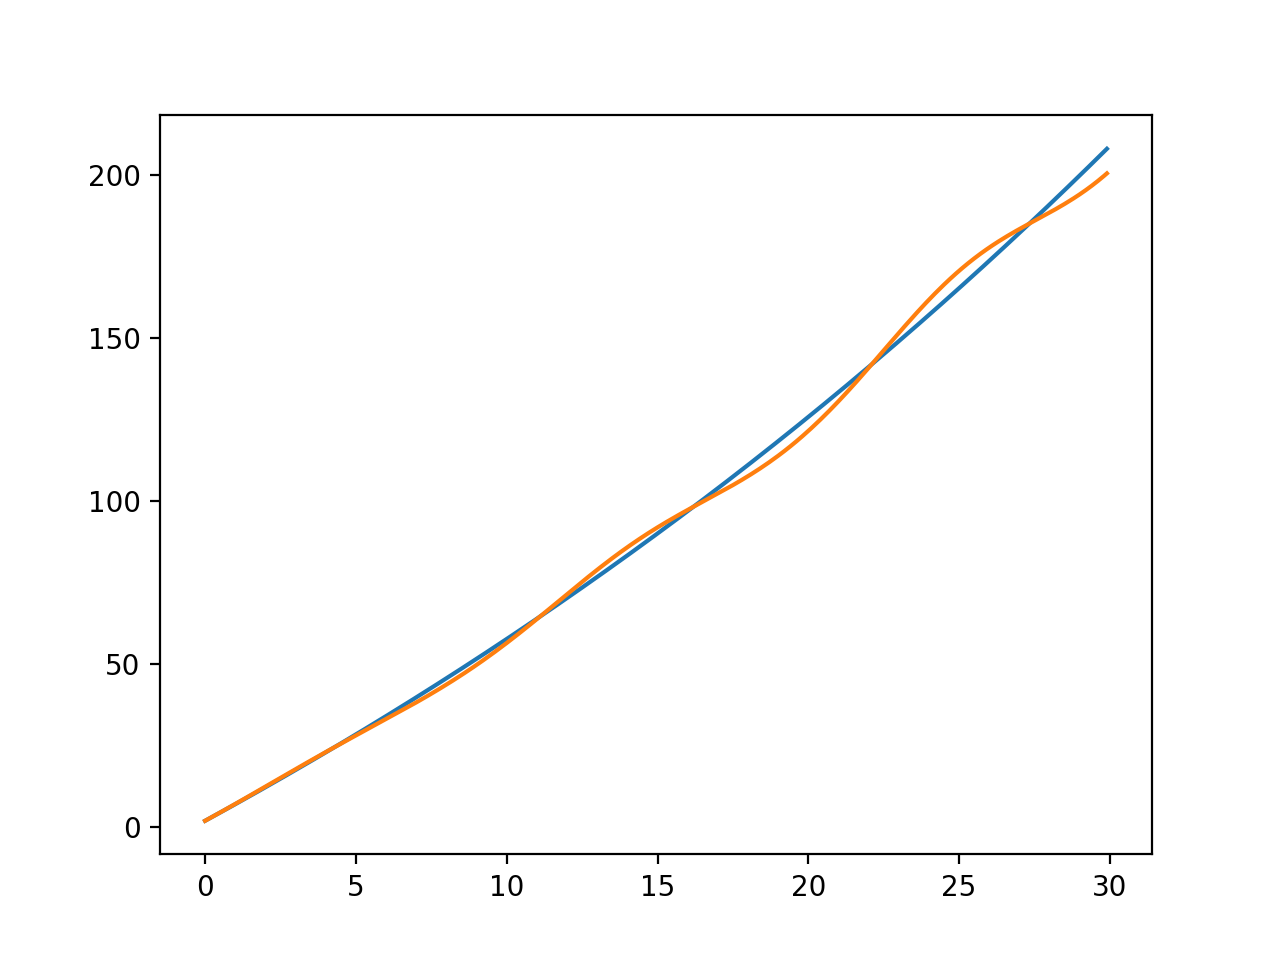

In [21]:
pl.figure()
pl.plot(t.to(ur.year).magnitude,dol_history.to(ur.dollars).magnitude/1000, '-')
pl.plot(t.to(ur.year).magnitude,dol_history2.to(ur.dollars).magnitude/1000, '-')

### Your own modification
Now do your own modification, changing the assumptions. Perhaps assume that your income will increase over time, giving a higher value of `s`. You could modify `dol0`, making it negative to represent debt such as student loans. The calculation will show how and when your assets go from negative to positive (typically the interest rate on savings is lower than on loans, so you should then have `r` decrease when `dol` becomes positive). You could investigate the effect of riskier investments -- increasing the average value of the fluctuating interest rate but also the amount of fluctuation. 

Store and plot out the results and compare with `dol_history` and `dol_history2`. What do you conclude? Have some fun with it!

In [29]:
dol_history3=np.zeros(len(t))*ur.dollars
dol = -2000 * ur.dollars
for tcnt in range(len(t)):
    # Store the current value of dol in dol_history
    dol_history3[tcnt] = dol

    
    # Calculate the change in dollars in this iteration
    # (From the formula under "Simpler alternative", above).
    ddol = (s+r*dol)*dt
    
    # Write code here to assign to dol its old value plus the change
    dol=ddol+dol
    print(dol)


-1504.0 dollars
-1007.008 dollars
-509.022016 dollars
-10.040060032000042 dollars
489.93985984793596 dollars
990.9197395676318 dollars
1492.9015790467672 dollars
1995.8873822048608 dollars
2499.8791569692708 dollars
3004.8789152832096 dollars
3510.888673113776 dollars
4017.9104504600036 dollars
4525.946271360924 dollars
5034.998163903645 dollars
5545.068160231453 dollars
6056.158296551916 dollars
6568.2706131450195 dollars
7081.40715437131 dollars
7595.569968680053 dollars
8110.761108617413 dollars
8626.982630834647 dollars
9144.236596096316 dollars
9662.52506928851 dollars
10181.850119427087 dollars
10702.213819665942 dollars
11223.618247305274 dollars
11746.065483799885 dollars
12269.557614767484 dollars
12794.096729997018 dollars
13319.684923457013 dollars
13846.324293303927 dollars
14374.016941890535 dollars
14902.764975774317 dollars
15432.570505725866 dollars
15963.435646737318 dollars
16495.362518030794 dollars
17028.353243066857 dollars
17562.40994955299 dollars
18097.534769452

<IPython.core.display.Javascript object>


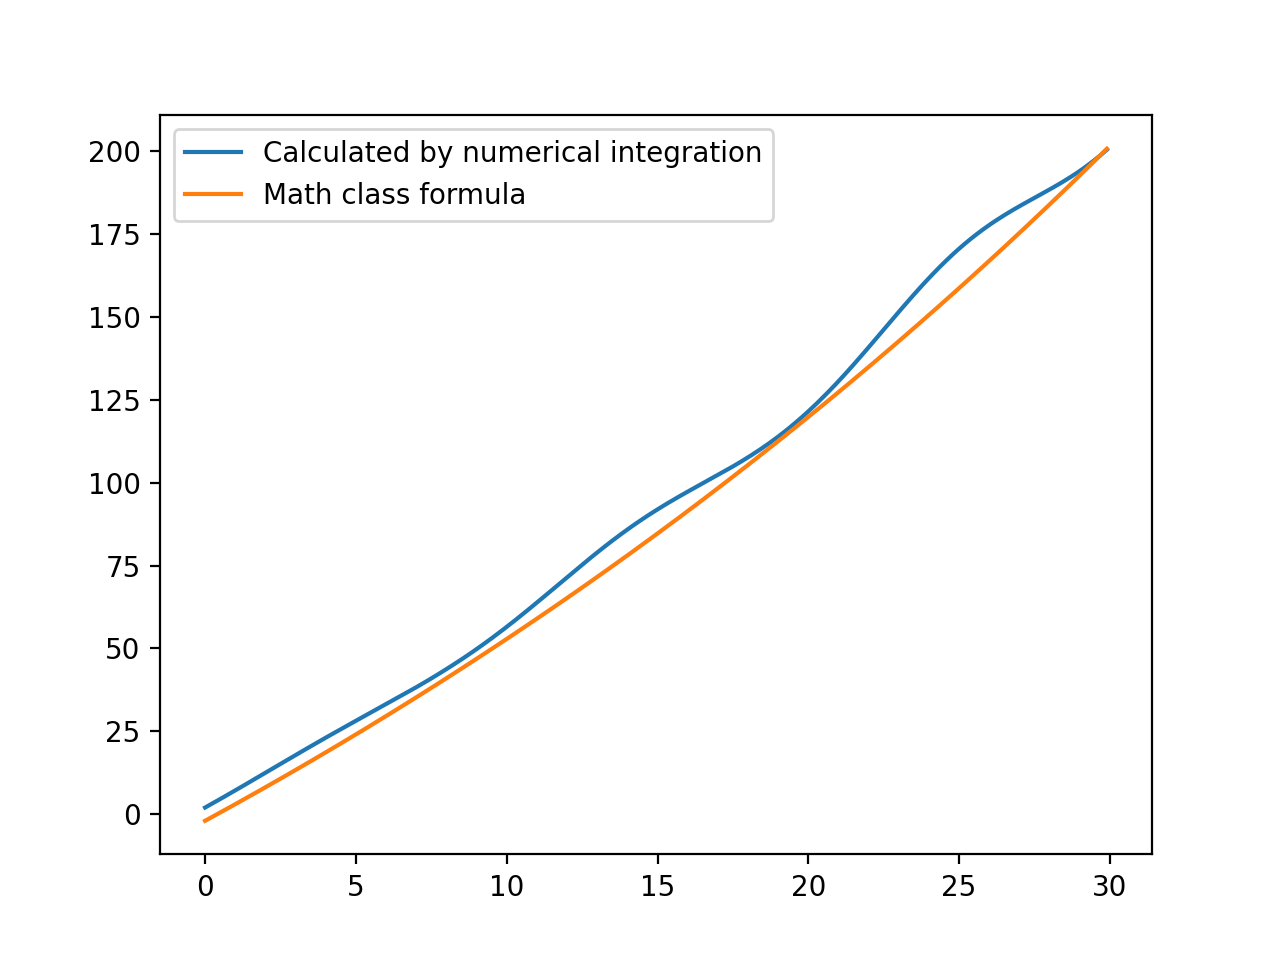

In [28]:
pl.figure()
pl.plot(t.to(ur.year).magnitude,dol_history2.to(ur.dollars).magnitude/1000, '-')
pl.plot(t.to(ur.year).magnitude,dol_history3.to(ur.dollars).magnitude/1000, '-')
pl.legend(('Calculated by numerical integration',''))